In [1]:
from ANEMO import ANEMO
from ANEMO import read_edf

import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# Retrieving the data

In [2]:
datafile = 'data/enregistrement_AM_2017-10-23_100057.asc'

try:
    data = read_edf(datafile, 'TRIALID')
except:
    from urllib.request import urlopen
    url = 'https://github.com/chloepasturel/AnticipatorySPEM/raw/master/data/enregistrement_AM_2017-10-23_100057.asc'
    
    with open(datafile, 'wb') as f:
        f.write(urlopen(url).read())
    urlopen(url).close()
    f.close()
    data = read_edf(datafile, 'TRIALID')
    


expfile = 'data/enregistrement_AM_2017-10-23_100057.pkl'

try :
    with open(expfile, 'rb') as fichier :
        exp = pickle.load(fichier, encoding='latin1')
except :
    from urllib.request import urlopen
    url = 'https://github.com/chloepasturel/AnticipatorySPEM/raw/master/data/enregistrement_AM_2017-10-23_100057.pkl'
    
    with open(expfile, 'wb') as f:
        f.write(urlopen(url).read())
    urlopen(url).close()
    f.close()
    with open(expfile, 'rb') as fichier :
        exp = pickle.load(fichier, encoding='latin1')

# Demo

In [3]:
Plot = ANEMO.Plot(exp)
Fit = ANEMO.Fit(exp)

In [4]:
# number of the trial and block that you want to display with plot_data and plot_fit
trial=11
block=1

# for plot_Full_data and Fit_full
# display the first ten trials divided into two blocks of 5 trials each
data1 = data[:10]
N_blocks = 2
N_trials = 5

In [5]:
def demo(data_show, equation):
    fig, axs = Plot.plot_equation(equation=equation)
    plt.show()
    fig, axs = Plot.plot_data(data=data, show=data_show, trials=trial, block=block, show_target=True)
    plt.show()
    fig, axs = Plot.plot_fit(data=data, equation=equation, trials=trial, block=block)
    plt.show()
    
    print('Filtre sur la position :')
    fig, axs = Plot.plot_fit(data=data, equation=equation, trials=trial, block=block,
                            filt='position', cutoff=30, sample_rate=1000)
    plt.show()
    
    if data_show=='velocity' :
        print('Filtre sur la vitesse :')
        fig, axs = Plot.plot_fit(data=data, equation=equation, trials=trial, block=block,
                                filt='velocity', cutoff=30, sample_rate=1000)
        plt.show()

        print('Filtre sur la position et la vitesse :')
        fig, axs = Plot.plot_fit(data=data, equation=equation, trials=trial, block=block,
                                filt='velocity-position', cutoff=30, sample_rate=1000)
        plt.show()

    
    print('\nPlot Full Data\n---------------\n')
    Plot.plot_Full_data(data=data1, show=data_show, N_blocks=N_blocks, N_trials=N_trials,
                    file_fig='result/%s'%data_show)
    print('\nfigure data saved in result/%s\n------------------------------\n'%data_show)
    
    
    print('\nPlot Full Fit\n---------------\n')
    param = Fit.Fit_full(data=data1, equation=equation, plot=True,
                         N_blocks=N_blocks, N_trials=N_trials, file_fig='result/Fit_%s'%equation)
    
    '''
    # pour fitter sur des donnée Filtrée
    param = Fit.Fit_full(data=data1, equation=equation, plot=True,
                         N_blocks=N_blocks, N_trials=N_trials, file_fig='result/Fit_filtre_%s'%equation,
                         filt='velocity-position', cutoff=30, sample_rate=1000)
    '''
    
    print('\nfigure fit saved in result/Fit_%s'%equation)

    # saves the fit parameters
    with open('result/param_Fit_AM_%s.pkl'%equation, 'wb') as fichier:
        f = pickle.Pickler(fichier)
        f.dump(param)
    print('param fit saved in result/param_Fit_%s_AM\n------------------------------\n'%equation)

## Demo velocity

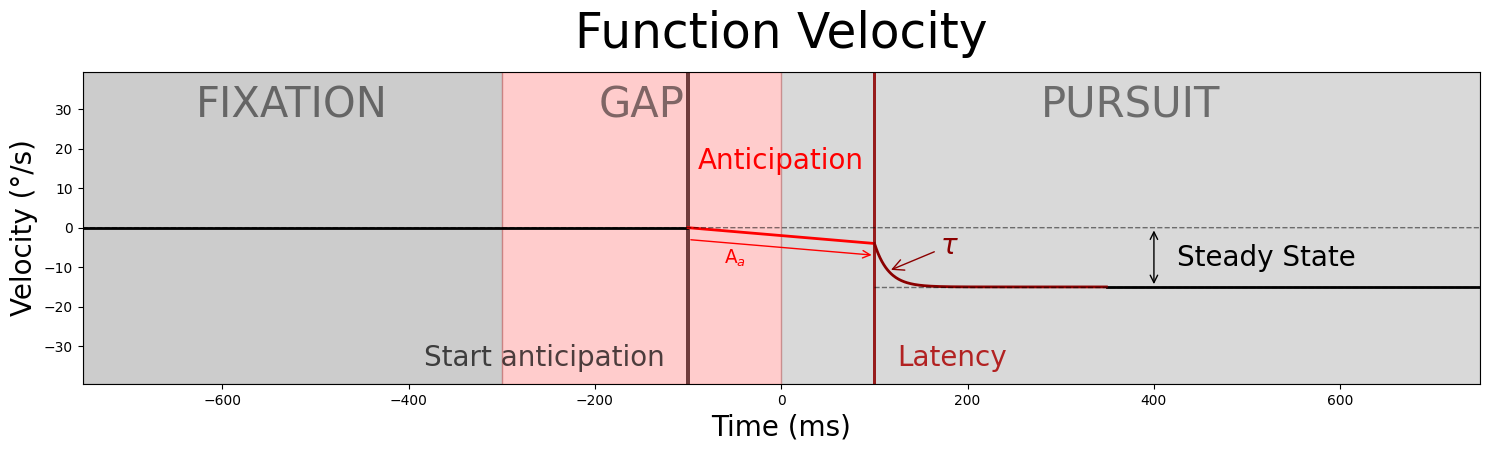

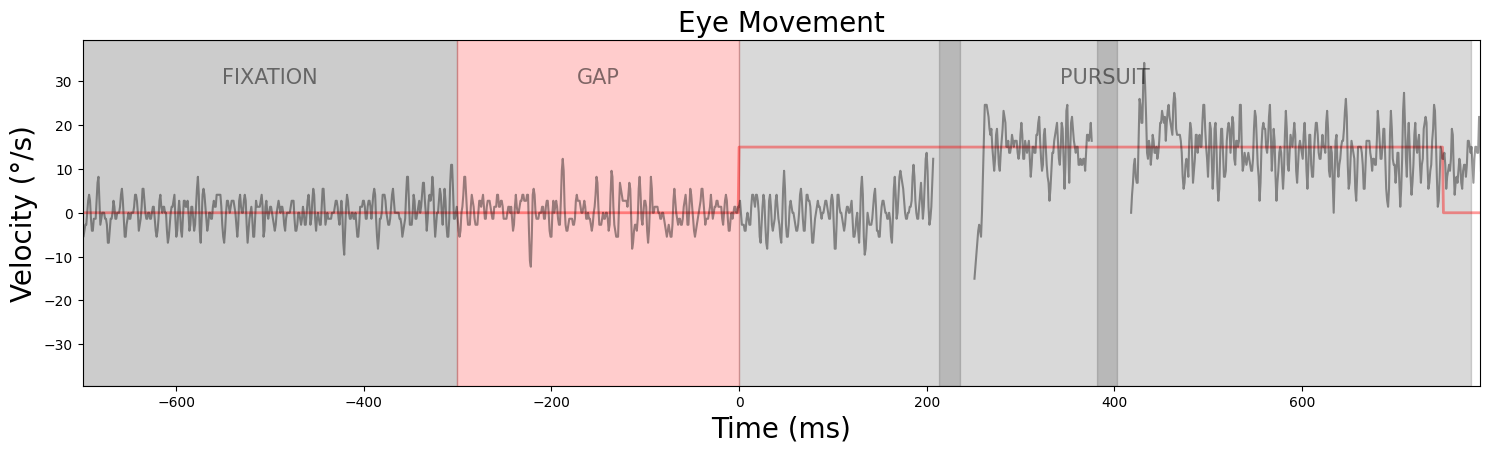

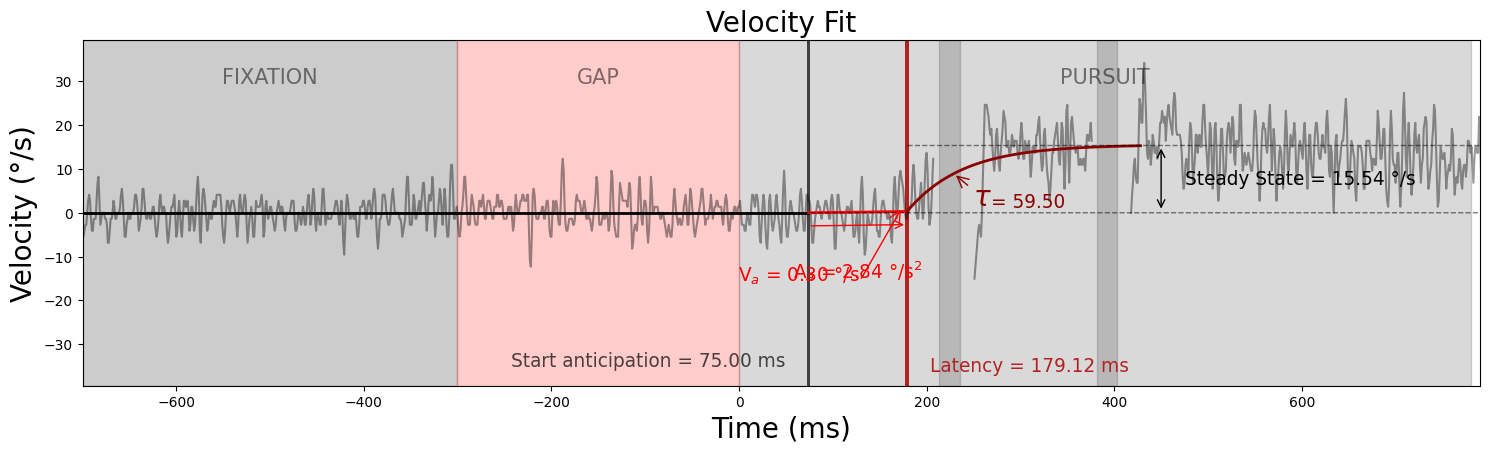

Filtre sur la position :


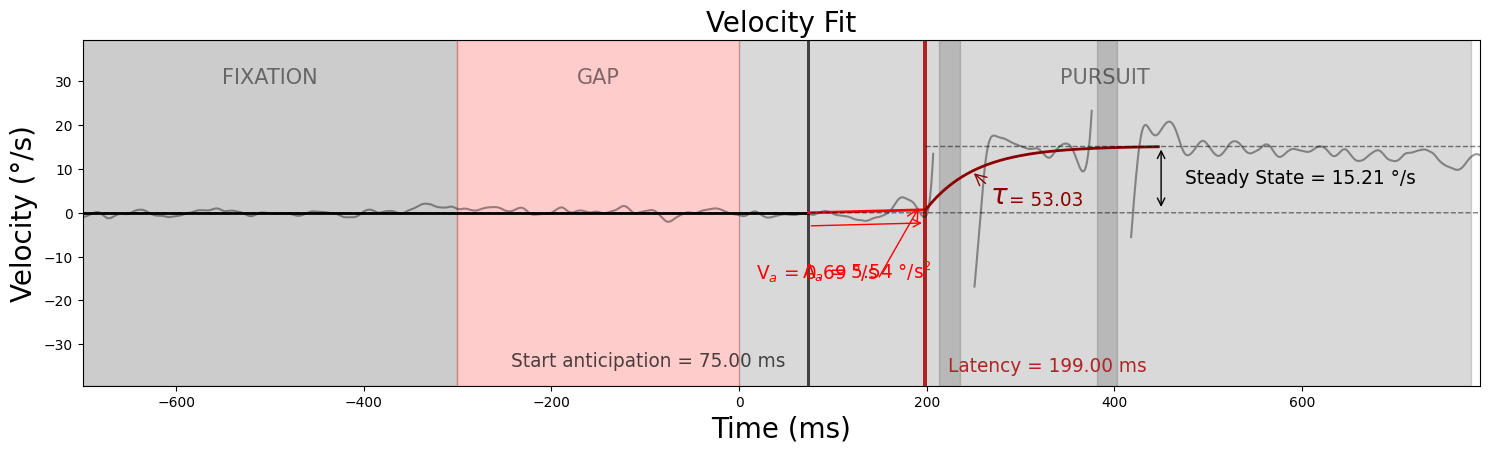

Filtre sur la vitesse :


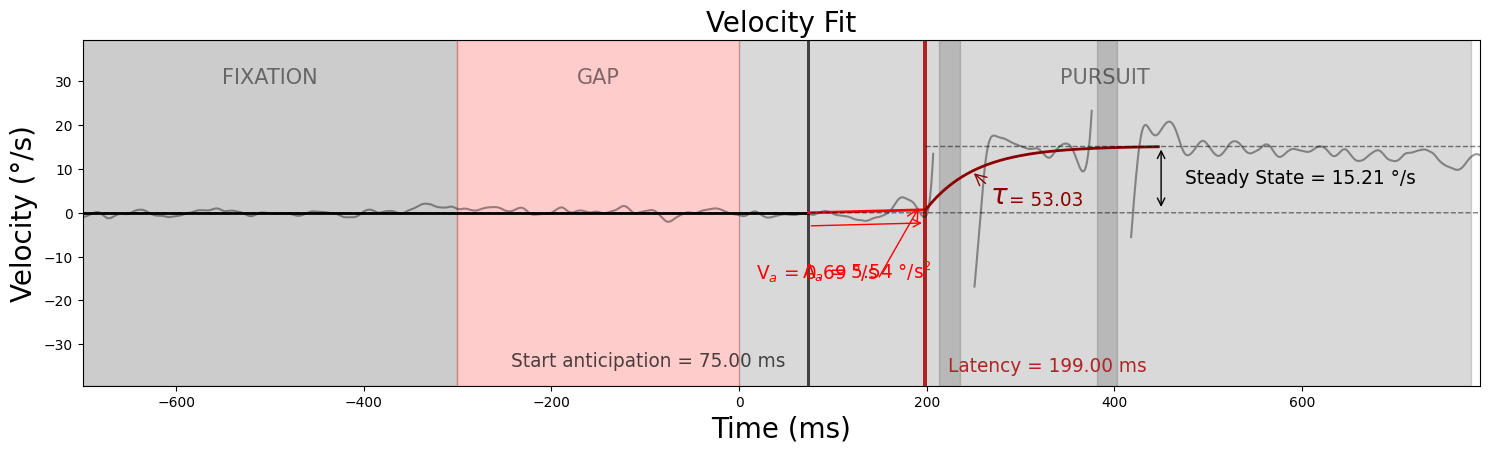

Filtre sur la position et la vitesse :


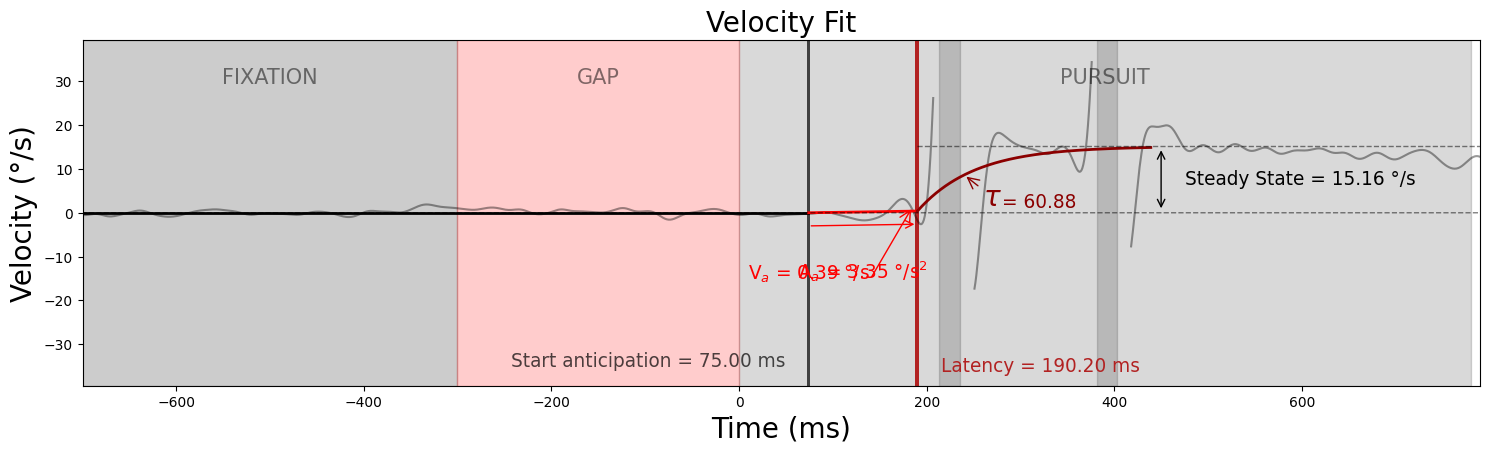


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/velocity
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_fct_velocity
param fit saved in result/param_Fit_fct_velocity_AM
------------------------------



In [6]:
demo('velocity', 'fct_velocity')

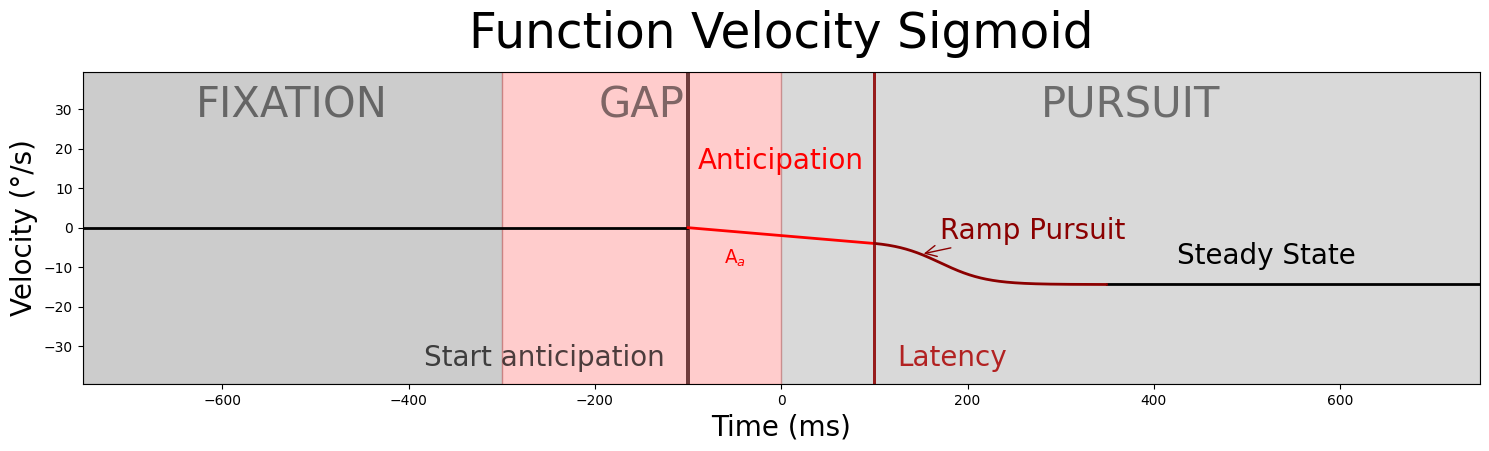

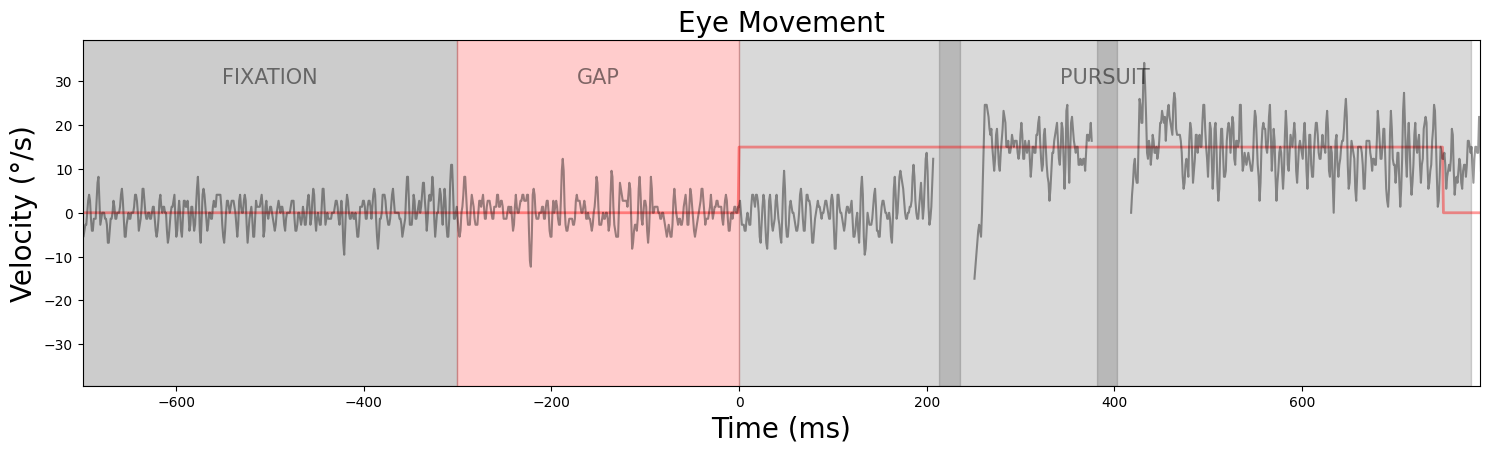

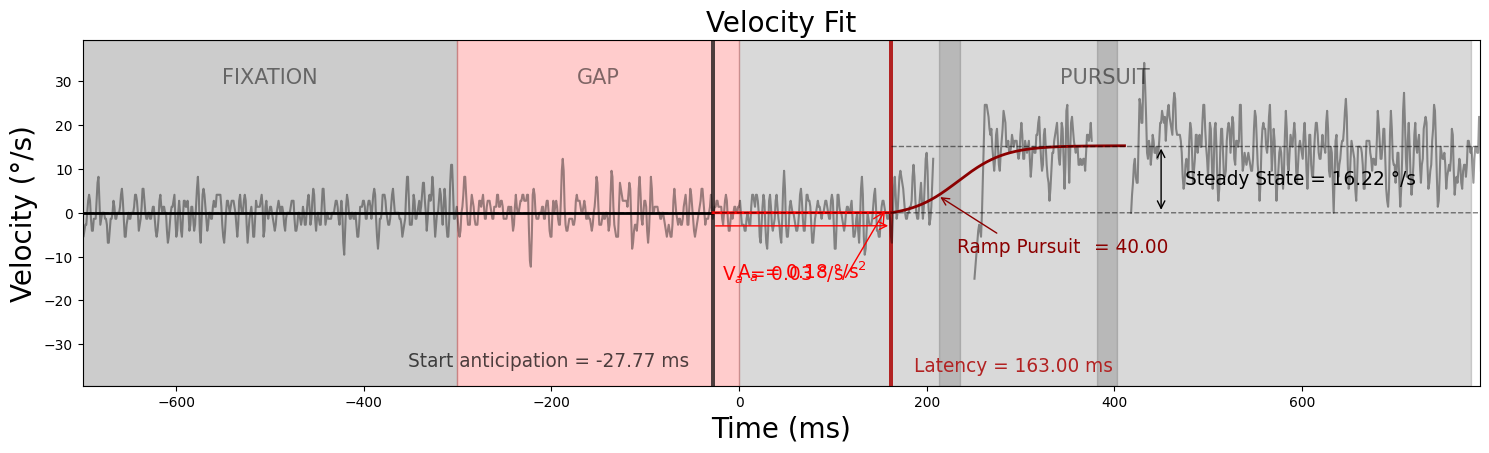

Filtre sur la position :


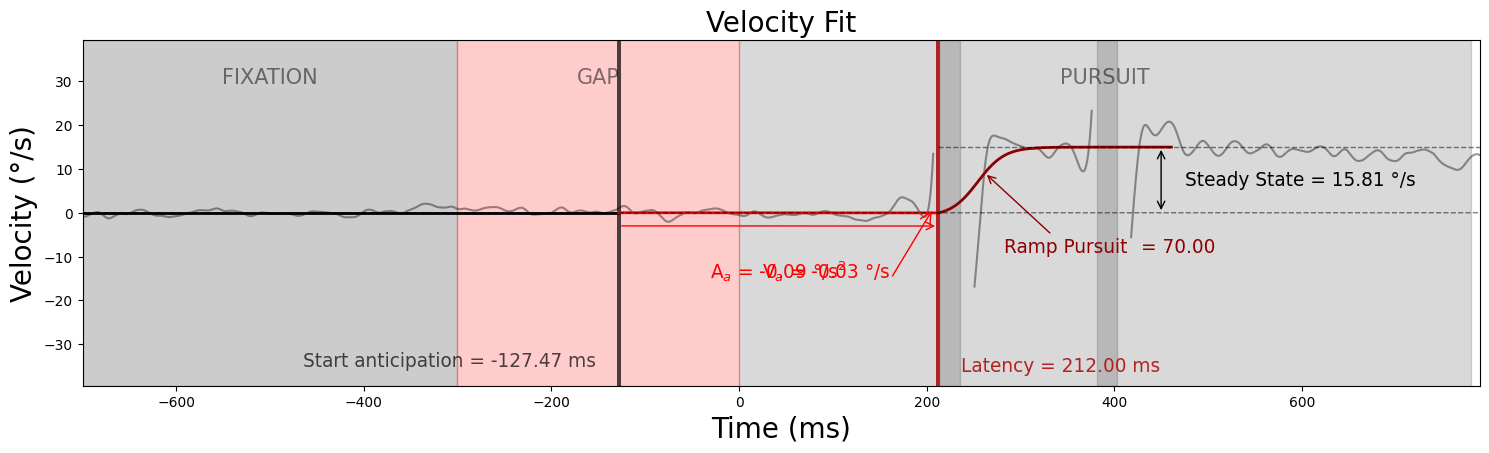

Filtre sur la vitesse :


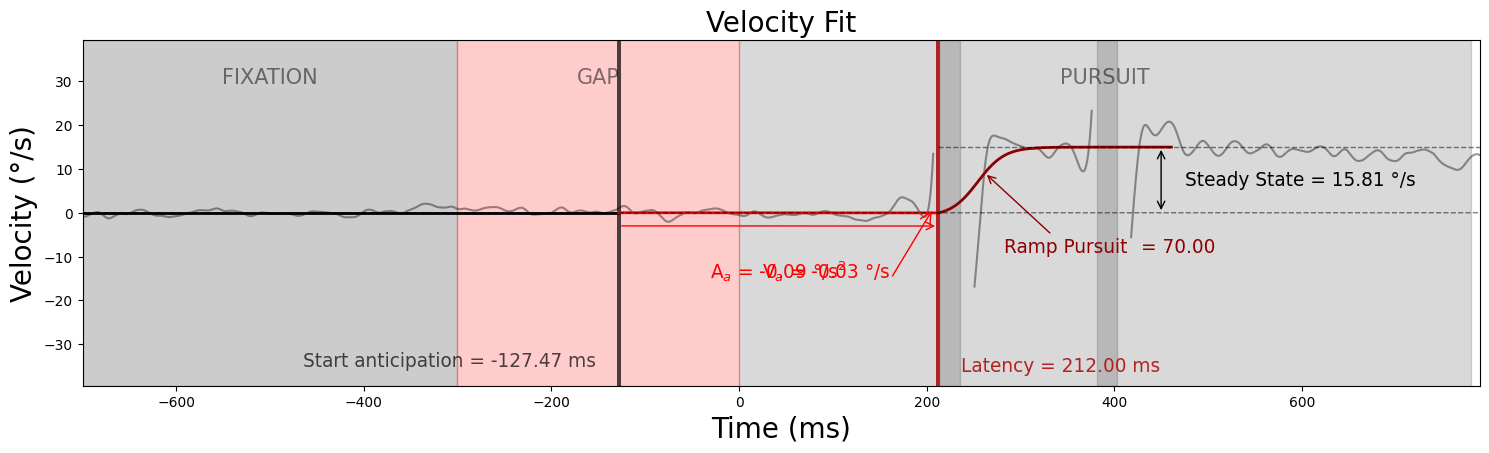

Filtre sur la position et la vitesse :


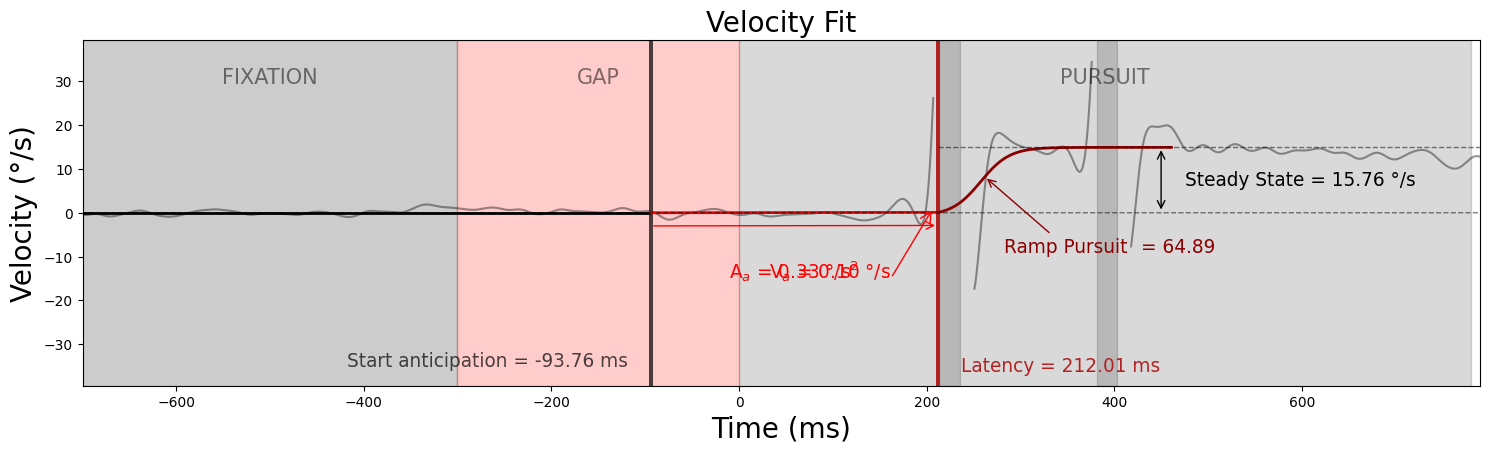


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/velocity
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_fct_velocity_sigmo
param fit saved in result/param_Fit_fct_velocity_sigmo_AM
------------------------------



In [7]:
demo('velocity', 'fct_velocity_sigmo')

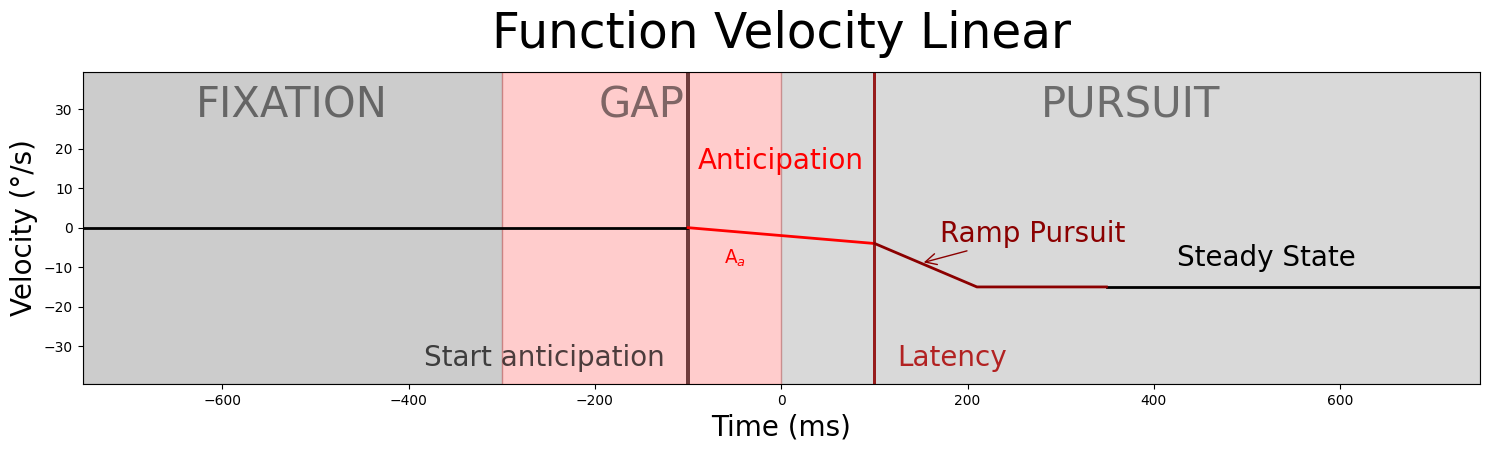

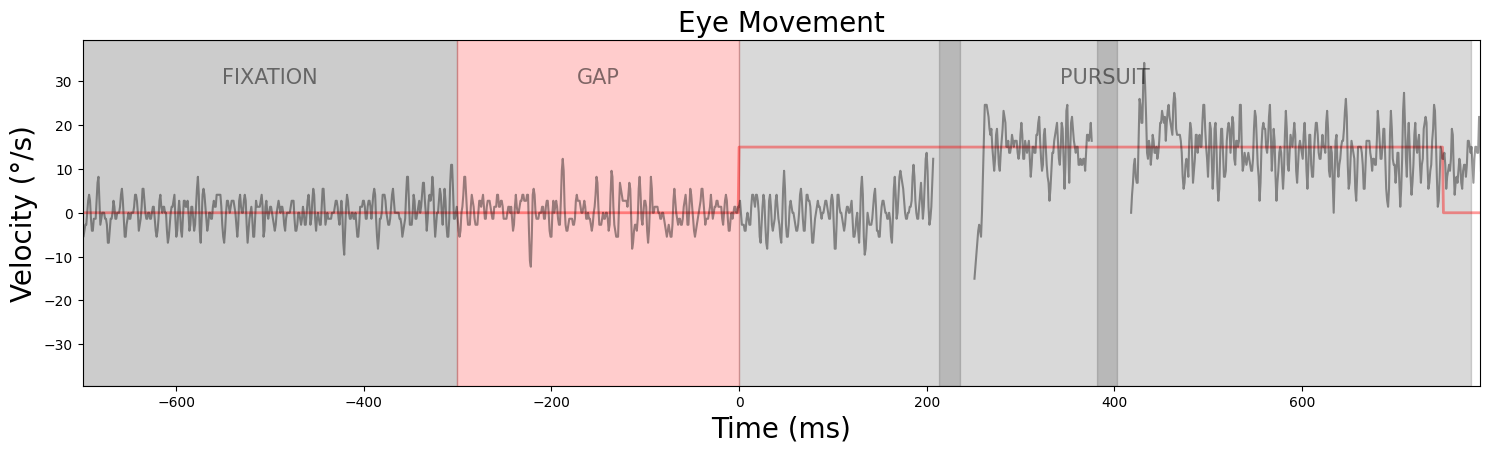

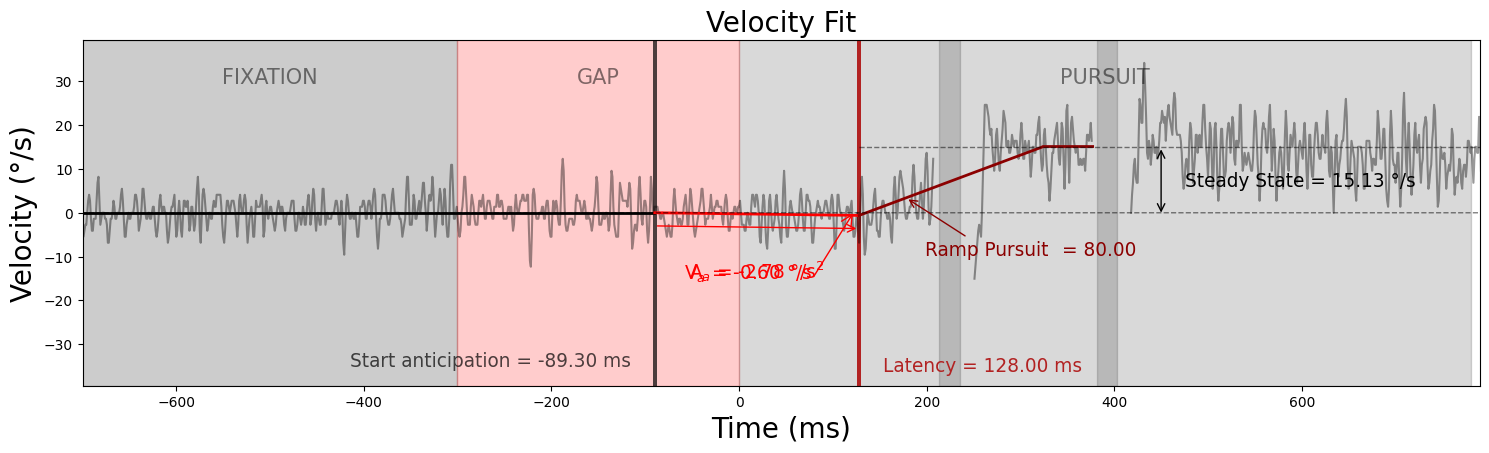

Filtre sur la position :


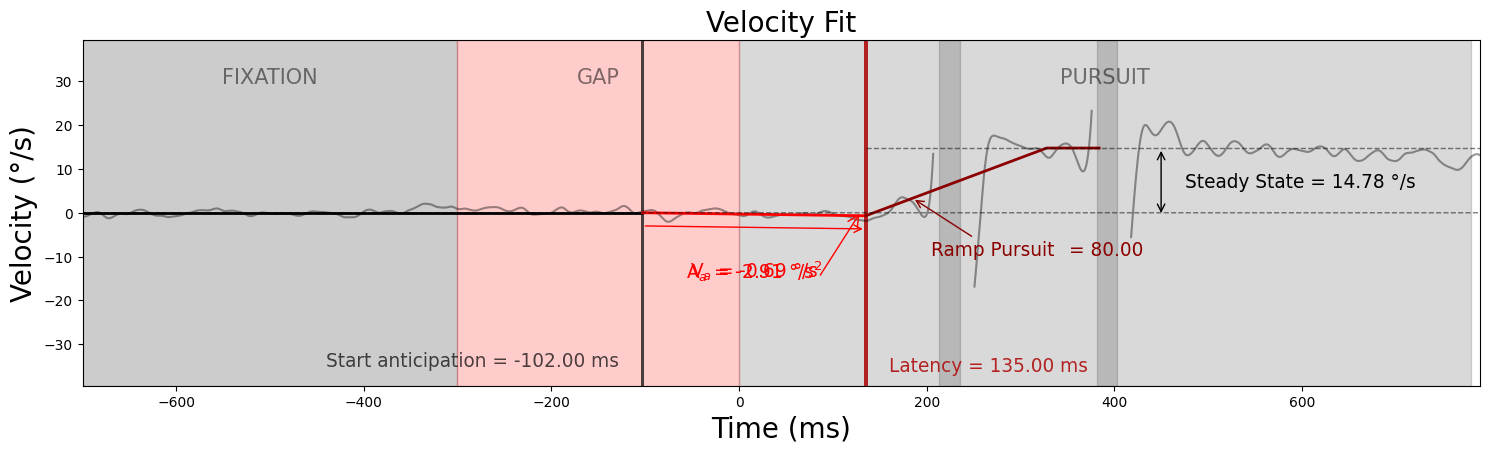

Filtre sur la vitesse :


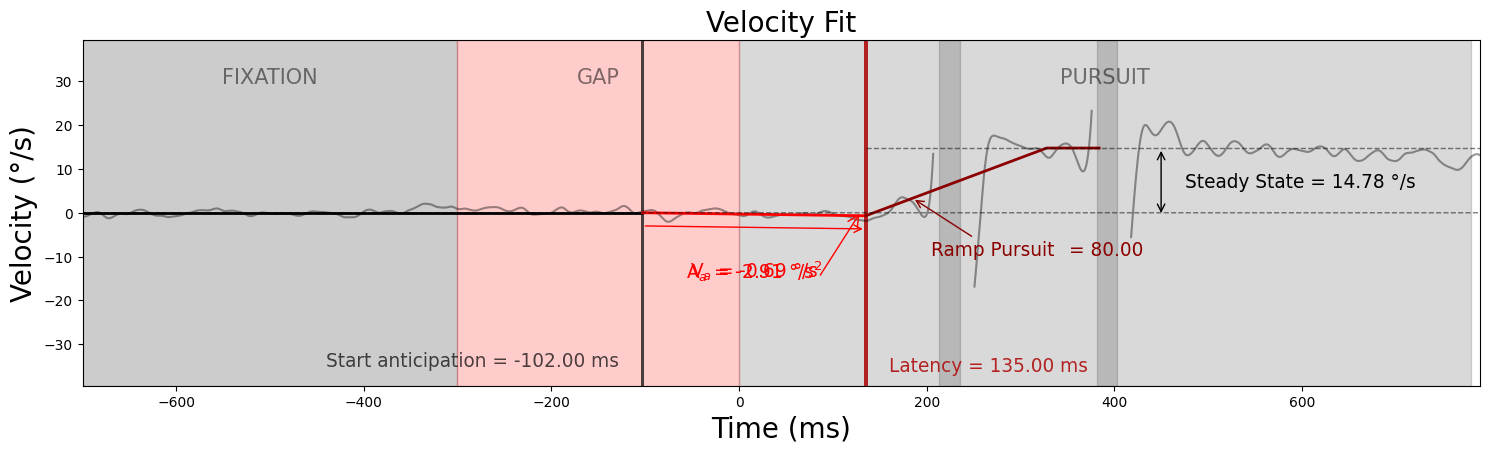

Filtre sur la position et la vitesse :


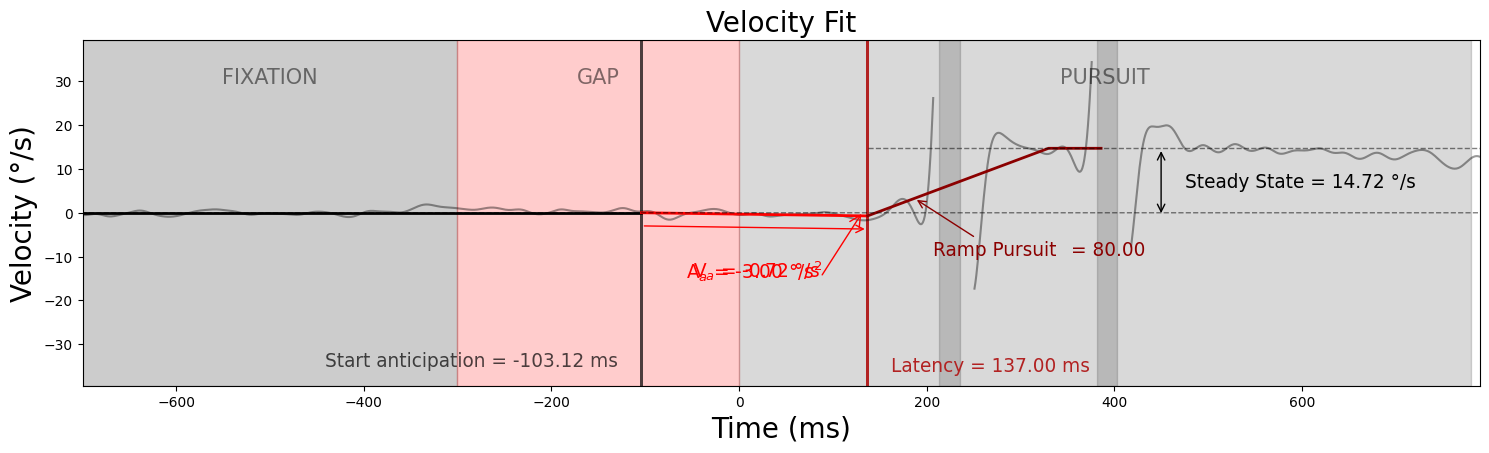


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/velocity
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_fct_velocity_line
param fit saved in result/param_Fit_fct_velocity_line_AM
------------------------------



In [8]:
demo('velocity', 'fct_velocity_line')

## Demo position

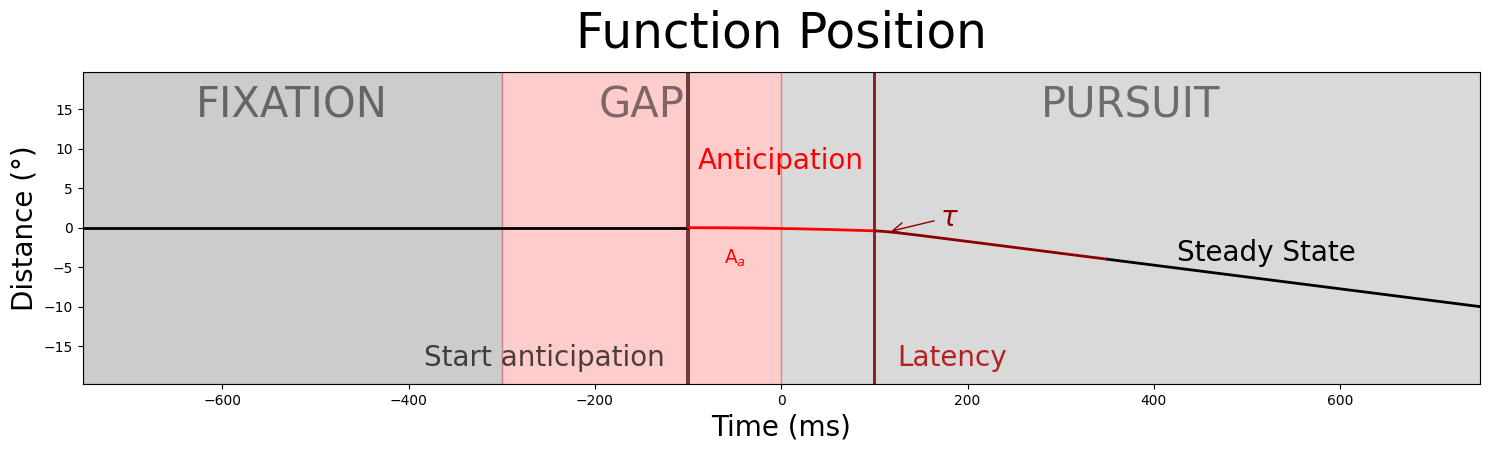

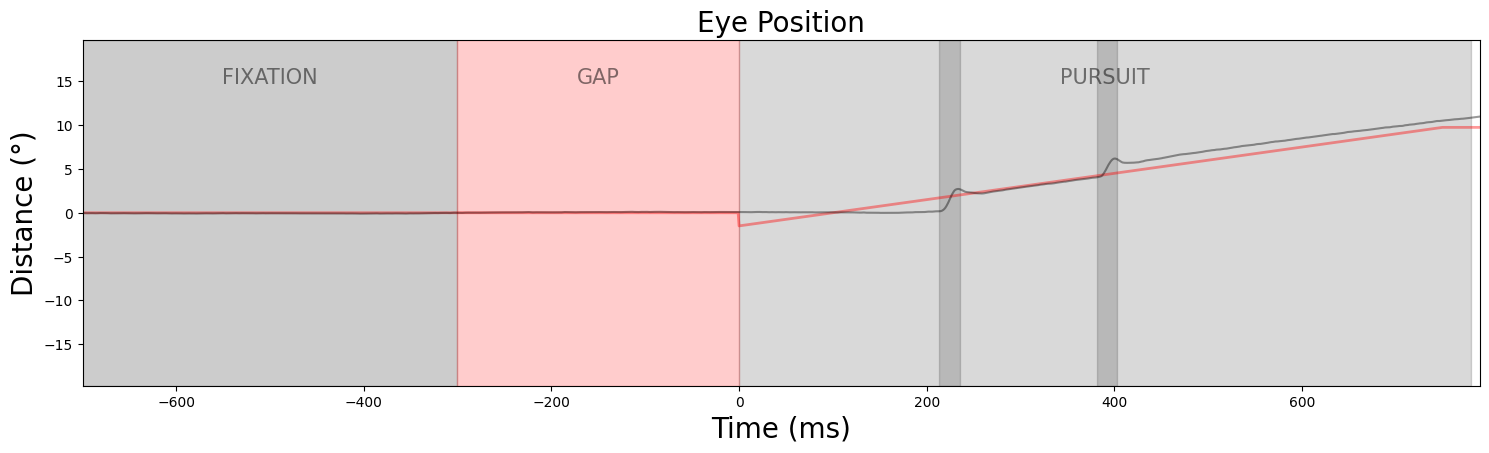

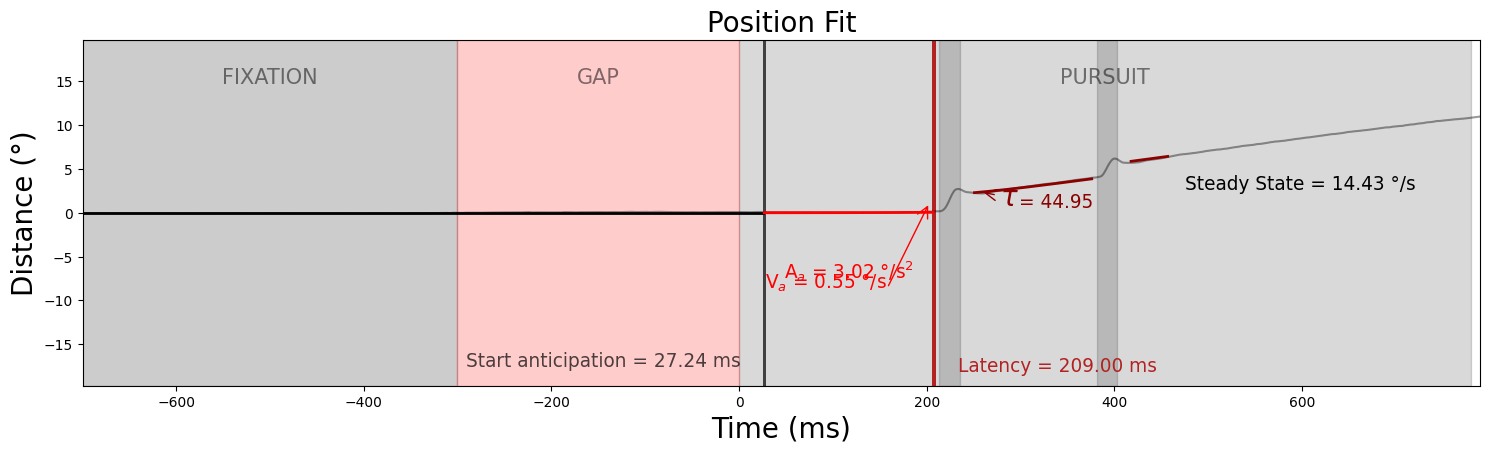

Filtre sur la position :


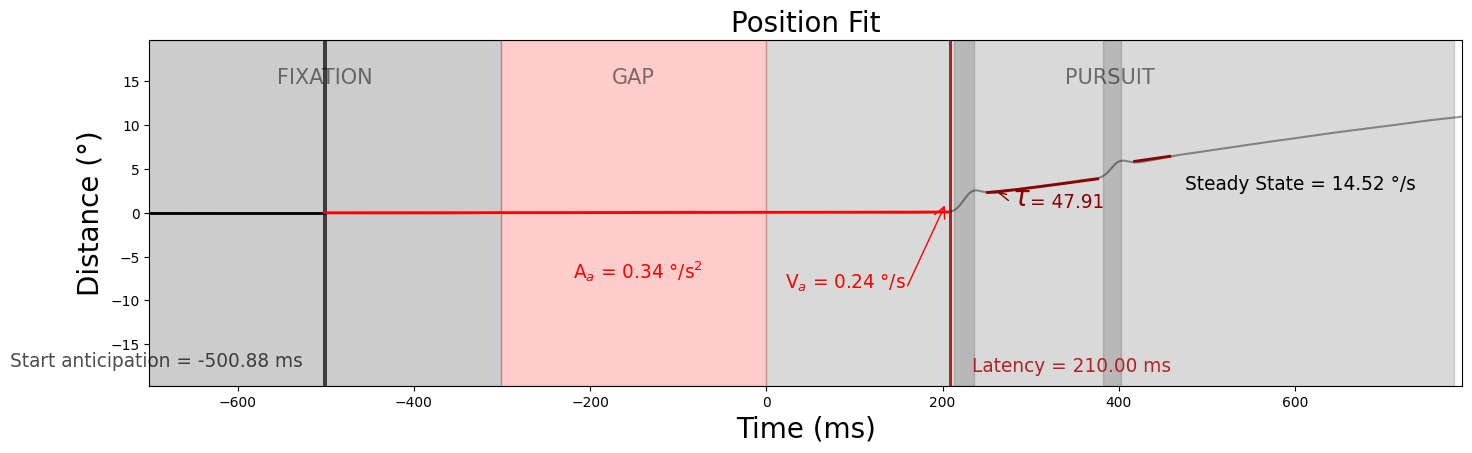


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/position
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_fct_position
param fit saved in result/param_Fit_fct_position_AM
------------------------------



In [9]:
demo('position', 'fct_position')

## Demo saccade

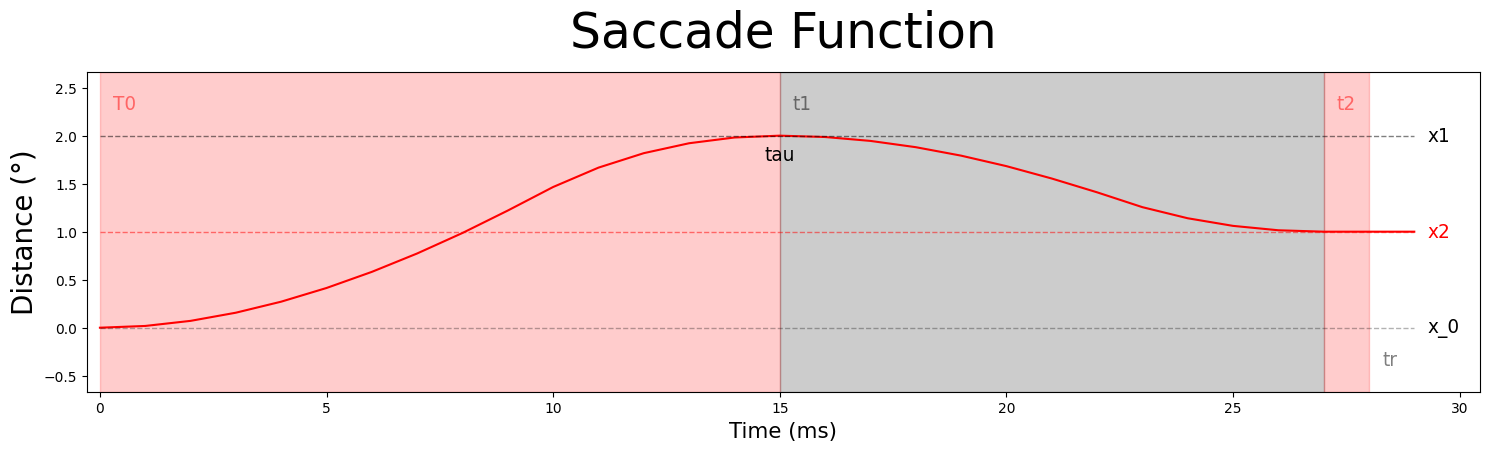

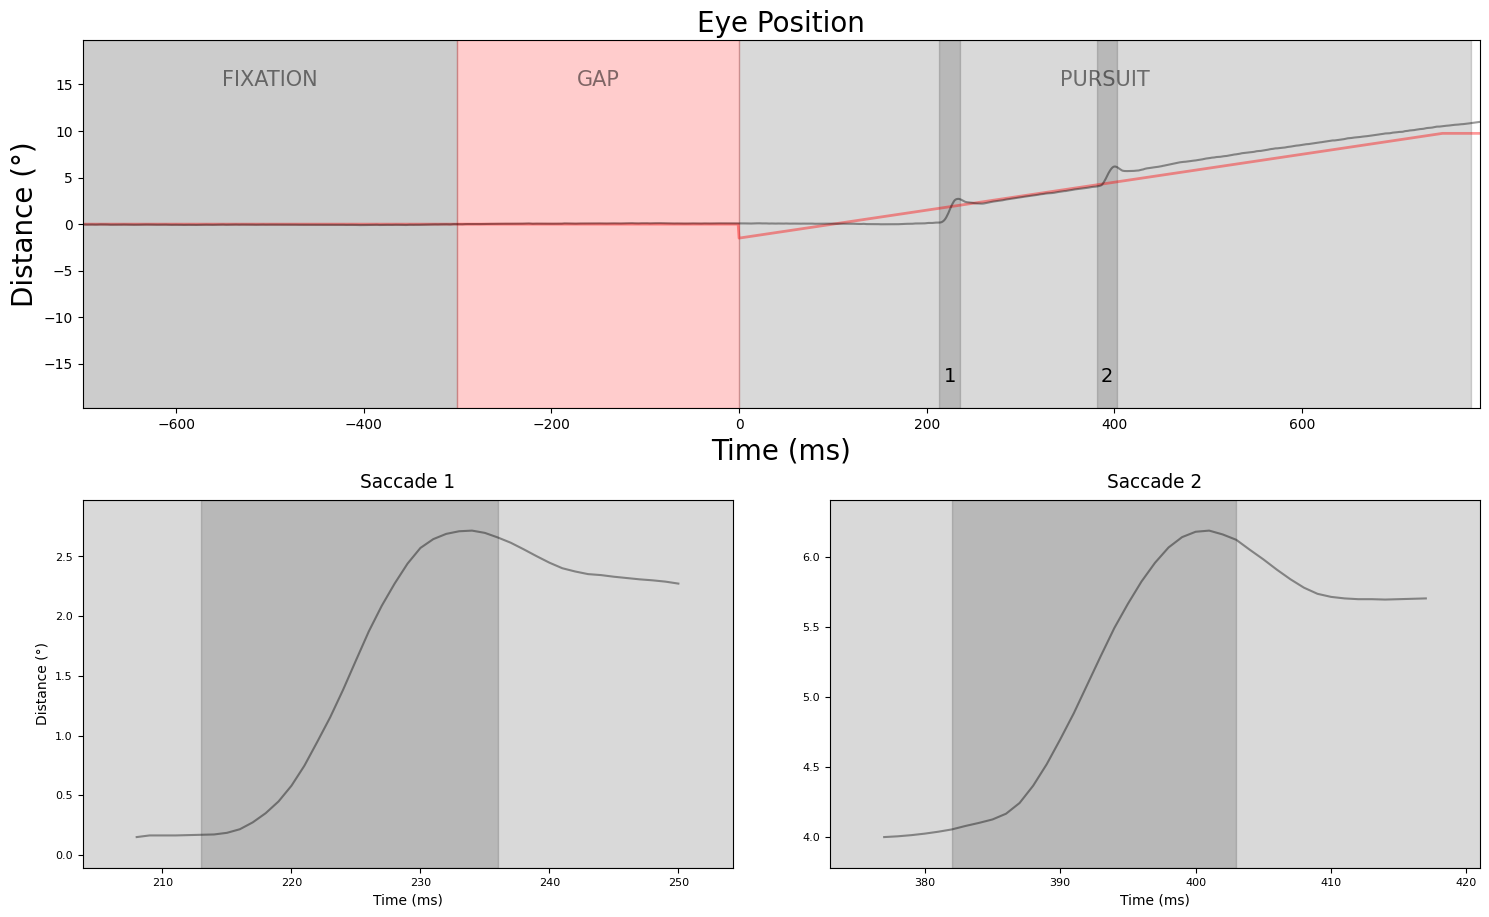

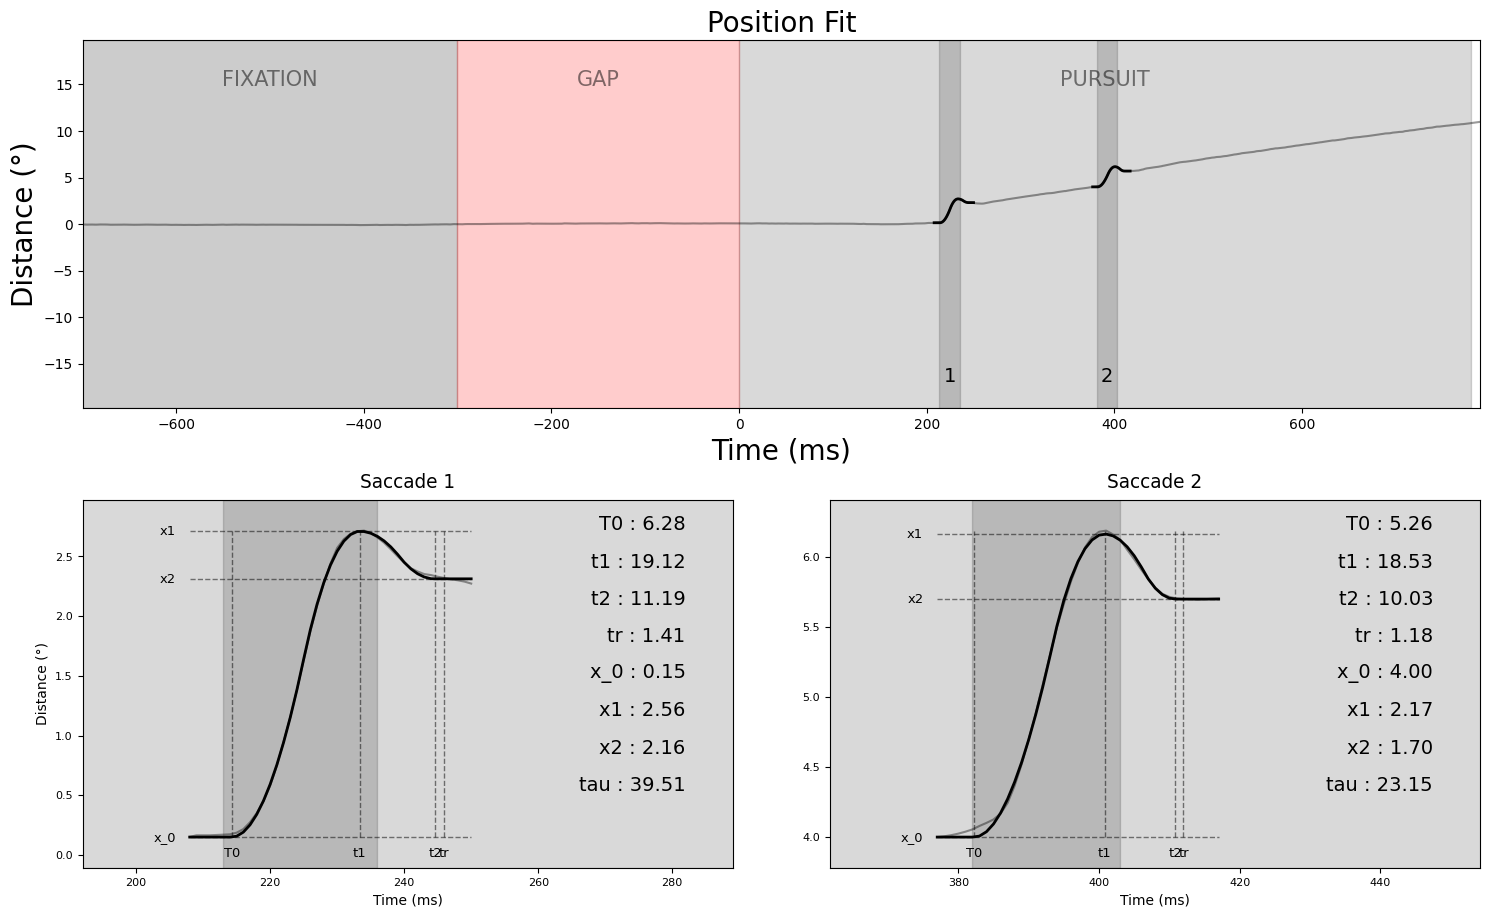

Filtre sur la position :


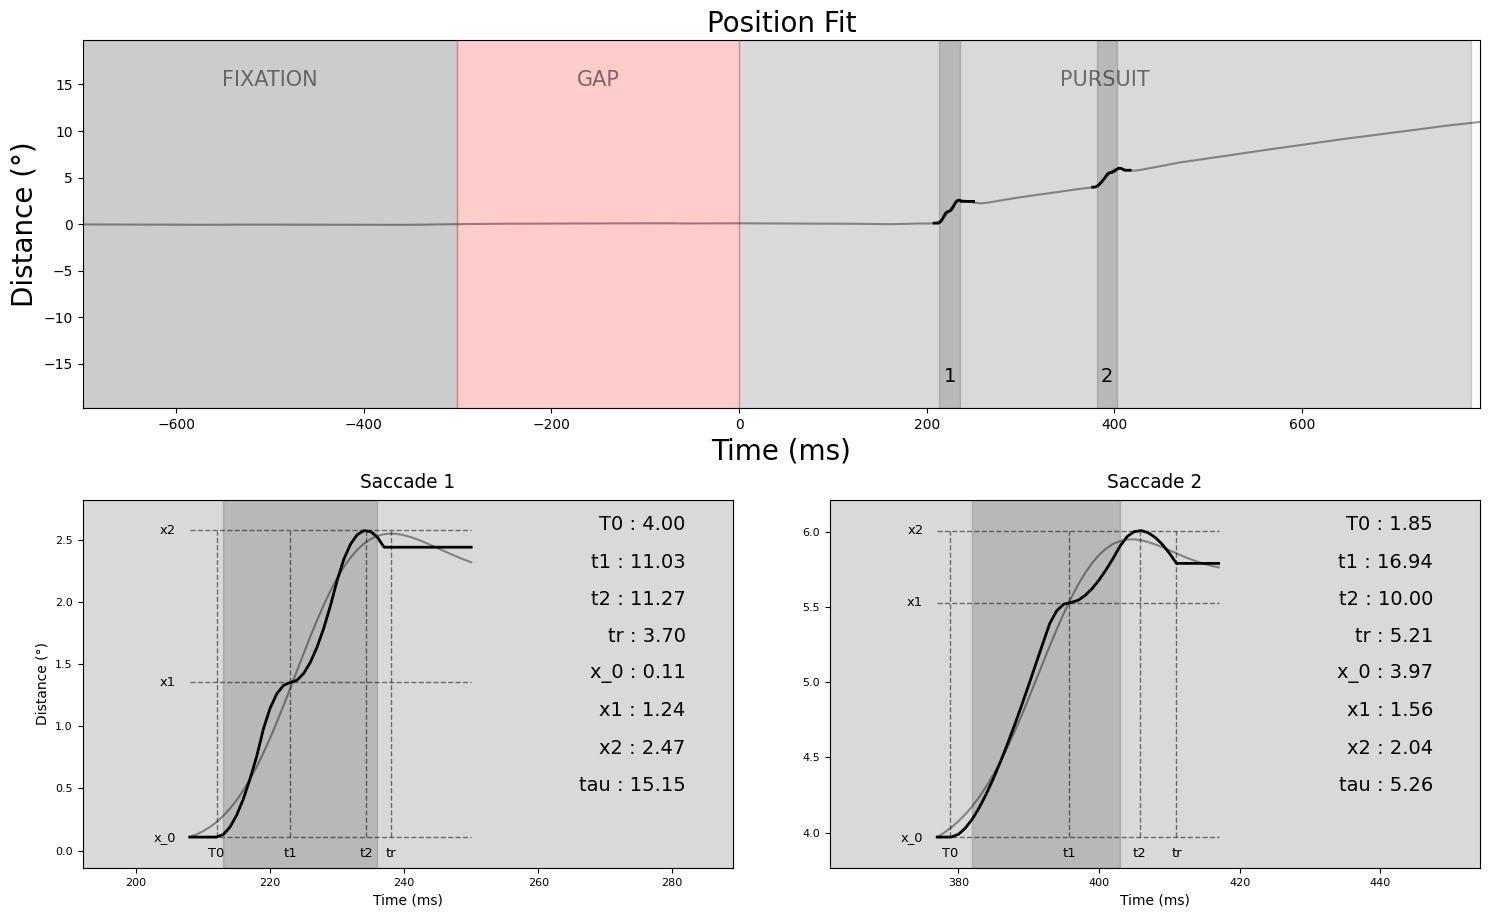


Plot Full Data
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure data saved in result/saccade
------------------------------


Plot Full Fit
---------------

block, trial =  0 0
block, trial =  0 1
block, trial =  0 2
block, trial =  0 3
block, trial =  0 4
block, trial =  1 0
block, trial =  1 1
block, trial =  1 2
block, trial =  1 3
block, trial =  1 4

figure fit saved in result/Fit_fct_saccade
param fit saved in result/param_Fit_fct_saccade_AM
------------------------------



In [10]:
demo('saccade', 'fct_saccade')

# Retrieving the parameters

In [11]:
def Retrieving_param(equation):
    with open('result/param_Fit_AM_%s.pkl'%equation, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    print('\nParam recorded\n---------------\n')
    print(param.keys())
    
    print('\nFor the first trial\n---------------\n')
    for name in param.keys() :
        if name not in ['stop_search_misac', 'step_fit', 'N_trials', 'goodness_of_fit',
                        'do_whitening', 'cutoff', 'after_sacc', 'N_blocks', 'sample_rate',
                        'filt', 'before_sacc', 'time_sup', 'observer'] :
            print(name, '=', param[name][0][0])

In [12]:
Retrieving_param('fct_velocity')


Param recorded
---------------

dict_keys(['N_blocks', 'N_trials', 'time_sup', 'step_fit', 'do_whitening', 'before_sacc', 'after_sacc', 'stop_search_misac', 'filt', 'cutoff', 'sample_rate', 'observer', 'start_anti', 'a_anti', 'latency', 'tau', 'steady_state', 'old_anti', 'old_steady_state', 'old_latency', 'goodness_of_fit', 'fit_values', 'covar'])

For the first trial
---------------

start_anti = 62.999827254661795
a_anti = -5.2847253568147465
latency = 193.99857057304257
tau = 72.36010992070744
steady_state = 15.123116281677705
old_anti = -0.3286044070072851
old_steady_state = 15.093442067421275
old_latency = nan
fit_values = Parameters([('steady_state', <Parameter 'steady_state', value=15.123116281677705, bounds=[5.0:40.0]>), ('dir_target', <Parameter 'dir_target', value=-1.0 (fixed), bounds=[-inf:inf]>), ('a_anti', <Parameter 'a_anti', value=-5.2847253568147465, bounds=[-40.0:40.0]>), ('latency', <Parameter 'latency', value=1166.9985705730426, bounds=[1048:1188]>), ('start_anti', 

In [13]:
Retrieving_param('fct_velocity_sigmo')


Param recorded
---------------

dict_keys(['N_blocks', 'N_trials', 'time_sup', 'step_fit', 'do_whitening', 'before_sacc', 'after_sacc', 'stop_search_misac', 'filt', 'cutoff', 'sample_rate', 'observer', 'start_anti', 'a_anti', 'latency', 'ramp_pursuit', 'steady_state', 'old_anti', 'old_steady_state', 'old_latency', 'goodness_of_fit', 'fit_values', 'covar'])

For the first trial
---------------

start_anti = -82.70437176412634
a_anti = -2.219013746928674
latency = 211.00032031027513
ramp_pursuit = 59.620461040888145
steady_state = 15.157642923019814
old_anti = -0.3286044070072851
old_steady_state = 15.093442067421275
old_latency = nan
fit_values = Parameters([('steady_state', <Parameter 'steady_state', value=15.157642923019814, bounds=[5.0:40.0]>), ('dir_target', <Parameter 'dir_target', value=-1.0 (fixed), bounds=[-inf:inf]>), ('a_anti', <Parameter 'a_anti', value=-2.219013746928674, bounds=[-40.0:40.0]>), ('latency', <Parameter 'latency', value=1184.0003203102751, bounds=[1048:1188]>)

In [14]:
Retrieving_param('fct_velocity_line')


Param recorded
---------------

dict_keys(['N_blocks', 'N_trials', 'time_sup', 'step_fit', 'do_whitening', 'before_sacc', 'after_sacc', 'stop_search_misac', 'filt', 'cutoff', 'sample_rate', 'observer', 'start_anti', 'a_anti', 'latency', 'ramp_pursuit', 'steady_state', 'old_anti', 'old_steady_state', 'old_latency', 'goodness_of_fit', 'fit_values', 'covar'])

For the first trial
---------------

start_anti = -55.0032047821594
a_anti = -1.2147368795253897
latency = 158.9999225045658
ramp_pursuit = 69.44546735182495
steady_state = 15.178660803795495
old_anti = -0.3286044070072851
old_steady_state = 15.093442067421275
old_latency = nan
fit_values = Parameters([('steady_state', <Parameter 'steady_state', value=15.178660803795495, bounds=[5.0:40.0]>), ('dir_target', <Parameter 'dir_target', value=-1.0 (fixed), bounds=[-inf:inf]>), ('a_anti', <Parameter 'a_anti', value=-1.2147368795253897, bounds=[-40.0:40.0]>), ('latency', <Parameter 'latency', value=1131.9999225045658, bounds=[1048:1188]>),

In [15]:
Retrieving_param('fct_position')


Param recorded
---------------

dict_keys(['N_blocks', 'N_trials', 'time_sup', 'step_fit', 'do_whitening', 'before_sacc', 'after_sacc', 'stop_search_misac', 'filt', 'cutoff', 'sample_rate', 'observer', 'start_anti', 'a_anti', 'latency', 'tau', 'steady_state', 'old_anti', 'old_steady_state', 'old_latency', 'goodness_of_fit', 'fit_values', 'covar'])

For the first trial
---------------

start_anti = -500.99999956322534
a_anti = -0.864471282746976
latency = 214.99999999945658
tau = 79.99999995969235
steady_state = 14.207149437273086
old_anti = -0.3286044070072851
old_steady_state = 15.093442067421275
old_latency = nan
fit_values = Parameters([('steady_state', <Parameter 'steady_state', value=14.207149437273086, bounds=[5.0:40.0]>), ('dir_target', <Parameter 'dir_target', value=-1.0 (fixed), bounds=[-inf:inf]>), ('a_anti', <Parameter 'a_anti', value=-0.864471282746976, bounds=[-40.0:40.0]>), ('latency', <Parameter 'latency', value=1187.9999999994566, bounds=[1048:1188]>), ('start_anti', <

In [16]:
Retrieving_param('fct_saccade')


Param recorded
---------------

dict_keys(['N_blocks', 'N_trials', 'time_sup', 'step_fit', 'do_whitening', 'before_sacc', 'after_sacc', 'stop_search_misac', 'filt', 'cutoff', 'sample_rate', 'observer', 'T0', 't1', 't2', 'tr', 'x_0', 'x1', 'x2', 'tau', 'goodness_of_fit', 'fit_values', 'covar'])

For the first trial
---------------

T0 = [-2.684686943721408, 4.6899050046894075, 6.065775677181094, 3.880115212582144]
t1 = [13.460739074222879, 24.73434882483074, 17.684325950459694, 17.702131935828934]
t2 = [10.071344192464837, 10.159555394702354, 10.000186418392317, 11.169361792492085]
tr = [7.0148982927312975, 3.416190773293158, 0.2497120226061919, 2.2483910593407677]
x_0 = [-0.12667640718657713, -0.2249708373513658, -4.014450505605894, -10.217030274599022]
x1 = [0.3710890599446053, -3.803934850145247, -2.4836993835387493, -1.4911860496021792]
x2 = [0.416075320895426, -2.3020923714440578, -1.5014804853076629, -0.9582386207360285]
tau = [22.177519828601554, 14.151031660323975, 12.107342593